In [1]:
from __future__ import print_function ## Force python3-like printing
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import os
import time

import sqlite3
from sqlalchemy import create_engine

then = time.time()

opsimdbpath = os.environ.get('OPSIMDBPATH')
# opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/astro_lsst_01_1068_sqlite.db.gz"
print(opsimdbpath)

engine = create_engine('sqlite:///' + opsimdbpath)

conn = sqlite3.connect(opsimdbpath)

cursor = conn.cursor()
query = 'SELECT COUNT(*) FROM Summary'
cursor.execute(query)

cursor.fetchall()

now = time.time()
print("time taken = ", now - then)

/Users/berto/data/LSST/OpSimOutputDBs/Pitt16/minion_1016_sqlite.db
time taken =  351.9230389595032


In [11]:
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night < 366', engine)
opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE fieldID == 2061', engine)
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night < 731 AND night > 365', engine)
# opsimdf = pd.read_sql_query('SELECT * FROM Summary', engine)

In [12]:
ddf = opsimdf.query('propID > 0') ## 56 is DDF
filters = np.unique(ddf["filter"])
print(filters)

['g' 'i' 'r' 'u' 'y' 'z']


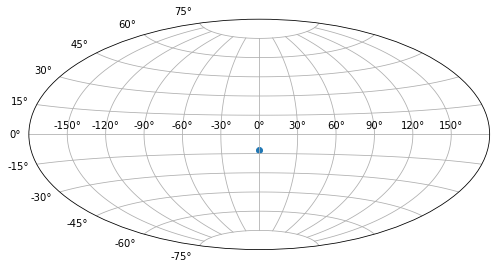

In [21]:
fig = plt.figure(figsize=[8, 4])

fig.subplots_adjust(left = 0.01, bottom = 0.05, top = 0.85, right = 0.99, hspace=0, wspace = 0)
ax = fig.add_subplot(111, projection="aitoff")
ax.grid(True)

for fieldID in ddf["fieldID"].unique():
    working_df = ddf.query("fieldID == "+str(fieldID))
#     print([working_df)
    ax.scatter(working_df["fieldRA"][0], working_df["fieldDec"][0])

In [25]:
mjd = ddf["expMJD"]
%store mjd
filters = ddf["filter"]
%store filters

Stored 'mjd' (Series)
Stored 'filters' (Series)


In [19]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

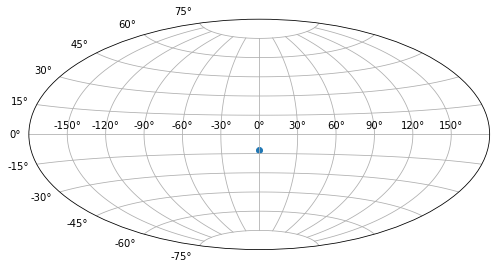